# lab: 1- Model Evaluation and Selection

Quantifying a learning algorithm's performance and comparing different models are some of the common tasks when applying machine learning to real world applications. In this lab, we will practice doing these using the tips shared in class. Specifically, we will:

* split datasets into training, cross validation, and test sets
* evaluate regression and classification models
* add polynomial features to improve the performance of a linear regression model
* compare several neural network architectures


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [26]:
# first let's try with regression model
# load the data
data= np.loadtxt(r"./data/data_w3_ex1.csv",delimiter=",")
x= data[:,0]
y= data[:,1]

# from 1-D to 2-D array ,convert
x= np.expand_dims(x,axis=1) 
y= np.expand_dims(y,axis=1)

Side Note

axis=0 = adds a batch/row dimension

axis=1 = adds a column/feature dimension

higher axes (like axis=2) = add depth/time/channel in more complex arrays (like images, sequences, etc.)

Text(0, 0.5, 'Target')

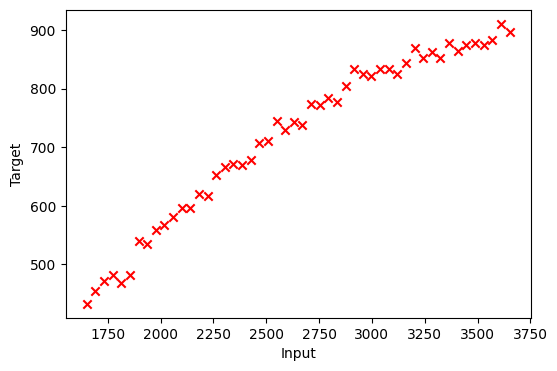

In [38]:
fig,ax= plt.subplots(figsize=(6,4))
ax.scatter(x,y,c='r',marker="x")
ax.set_xlabel("Input")
ax.set_ylabel("Target")

In [40]:
x_train,x_,y_train,y_ = train_test_split(x,y,test_size=0.4,random_state=1)

# now split into cross validation and test
x_cv,x_test,y_cv,y_test= train_test_split(x_,y_,test_size=0.5,random_state=2)

del x_,y_
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


Text(0, 0.5, 'Target')

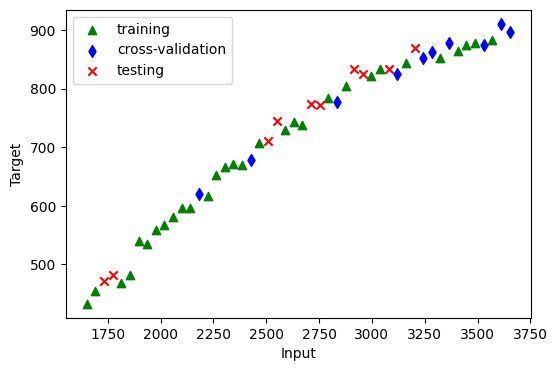

In [44]:
fig,ax= plt.subplots(figsize=(6,4))
ax.scatter(x_train,y_train,c='g',marker="^",label='training')
ax.scatter(x_cv,y_cv,c='b',marker='d',label='cross-validation')
ax.scatter(x_test,y_test,c='r',marker='x',label='testing')
ax.legend()
ax.set_xlabel("Input")
ax.set_ylabel("Target")

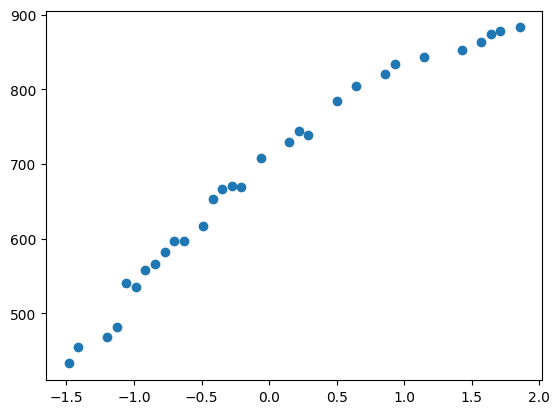

In [49]:
# feature scalling , mean=0 , varience =1
# intialize the class
linear_scalar= StandardScaler()
x_train_scaled= linear_scalar.fit_transform(x_train)
plt.scatter(x_train_scaled,y_train)

In [51]:
linear_model= LinearRegression()
linear_model.fit(x_train_scaled,y_train)

LinearRegression()